In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Building a Neural Network (ANN) to classify flowers into:

Setosa

Versicolor

Virginica

based on 4 features: sepal length, sepal width, petal length, and petal width.

## Load and Prepare Data

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Cleaning

In [3]:
## droping the ID column as it's uncessary
df.drop('Id', axis=1, inplace=True)

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
## Converting categorical column to numeric( Using label encoding)
df['Species'] = df['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1
                                   , 'Iris-virginica': 2})

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


* Data is cleaned now

In [8]:
X = df.drop('Species', axis=1)
y = df['Species']

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, 
                                                    random_state=42)

### Feature Scalling

In [11]:
##Let's scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Building

* Architecture of a simple neural network



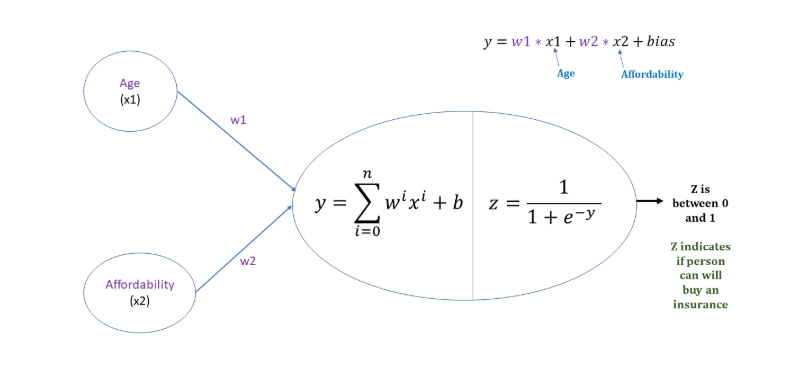

### Building the Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define your model
model = Sequential([
    Dense(8, activation='relu', input_shape=(4,)),   # Input + 1st hidden layer
    Dense(8, activation='relu'),                     # 2nd hidden layer
    Dropout(0.2),                                    # Dropout layer
    Dense(3, activation='softmax')                   # Output layer
])


2025-11-03 16:38:45.174284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762187925.456621      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762187925.552067      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-03 16:39:02.266279: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

* In summary

| Layer | Type    | Neurons | Activation | Purpose                          |
| ----- | ------- | ------- | ---------- | -------------------------------- |
| 1     | Dense   | 8       | ReLU       | Learn features from 4 inputs     |
| 2     | Dense   | 8       | ReLU       | Learn higher-level relationships |
| 3     | Dropout | —       | —          | Prevent overfitting              |
| 4     | Dense   | 3       | Softmax    | Output class probabilities       |


### Compile the Model

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**During training:**

The model predicts outputs using its current weights.

The loss function calculates how far predictions are from true labels.

The optimizer (Adam) updates the weights to reduce that loss.

Accuracy is reported to show progress.

### Train the Model

In [14]:
model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8
)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3502 - loss: 1.1705 - val_accuracy: 0.5200 - val_loss: 1.0536
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3788 - loss: 1.1099 - val_accuracy: 0.6000 - val_loss: 1.0312
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3529 - loss: 1.0878 - val_accuracy: 0.6000 - val_loss: 1.0105
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4969 - loss: 1.0343 - val_accuracy: 0.6800 - val_loss: 0.9879
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5185 - loss: 1.0175 - val_accuracy: 0.7000 - val_loss: 0.9668
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5990 - loss: 0.9779 - val_accuracy: 0.6800 - val_loss: 0.9444
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5228 - loss: 0.9705 - val_accuracy: 0.6800 - val_loss: 0.9181
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5707 - loss: 0.9220 - val_accuracy: 0.6400 - val

## Prediction on Test Data

In [15]:
model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[7.92402700e-02, 6.49528861e-01, 2.71230787e-01],
       [9.86380816e-01, 2.25210306e-03, 1.13671217e-02],
       [8.60159809e-04, 8.98120254e-02, 9.09327745e-01],
       [5.85478656e-02, 5.12239516e-01, 4.29212600e-01],
       [2.87129972e-02, 6.34789407e-01, 3.36497605e-01],
       [9.68368590e-01, 6.47531776e-03, 2.51561515e-02],
       [1.06851198e-01, 6.70386195e-01, 2.22762525e-01],
       [2.56676739e-03, 1.24663696e-01, 8.72769535e-01],
       [5.97279184e-02, 8.64442766e-01, 7.58292601e-02],
       [8.89931470e-02, 7.51712322e-01, 1.59294575e-01],
       [4.73410776e-03, 1.57026216e-01, 8.38239670e-01],
       [9.66570854e-01, 6.09195931e-03, 2.73371674e-02],
       [9.81823504e-01, 3.26366397e-03, 1.49128810e-02],
       [9.70502079e-01, 5.37835620e-03, 2.41194982e-02],
       [9.95198548e-01, 3.98533884e-04, 4.40297462e-03],
       [1.17827812e-02, 2.69630790e-01, 7.18586385e-01],
       [3.14101204e-03, 1.07640646e-01, 8.89218271e-01],
       [6.84681013e-02, 8.14346

Each row corresponds to one test sample,
and each column gives the predicted probability for each class.
* For example first row:
  
[0.000566, 0.9768, 0.0226]

This means:

Class 0 → 0.0005 probability

Class 1 → 0.9768 probability

Class 2 → 0.0226 probability

So the model is saying “I’m 97.6% confident this sample is class 1”.

### To get the final class labels (0, 1, 2)

Will take the argmax (index of the largest probability) for each row.

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 1 2
 0 0 0 2 2 2 0 0 1 2 2 1 2]


## Evaluate the Model

In [17]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9229 - loss: 0.2592


[0.28107088804244995, 0.8999999761581421]

* Getting a good accuracy with the low loss value. This shows excellent performance on the test set, with a very low loss and perfect accuracy.

### Let's Confusion Metrix and Classification Report for model evaluation

In [18]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [19]:
confusion_matrix(y_test, y_pred_classes)

array([[19,  0,  0],
       [ 0, 11,  4],
       [ 0,  1, 15]])

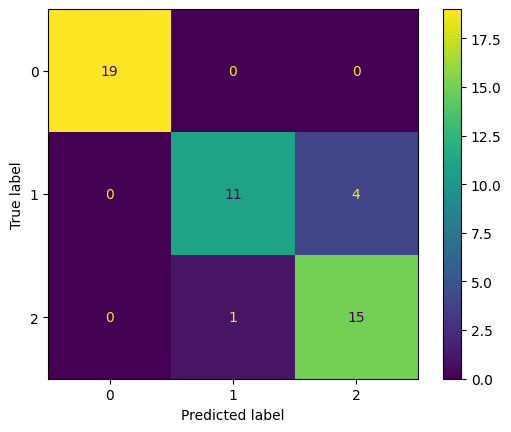

In [20]:
#Let's visulize the predictions
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

* Shows most of the classes are being correctly predicted

### Classification Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      0.73      0.81        15
           2       0.79      0.94      0.86        16

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.91      0.90      0.90        50



## Save and Load Back the Model

In [22]:
## To save the model

model.save('iris_classifier_model.keras')

In [23]:
## To load back the model
from tensorflow.keras.models import load_model

loaded_model = load_model('iris_classifier_model.keras')

In [24]:
loaded_model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9229 - loss: 0.2592 


[0.28107088804244995, 0.8999999761581421]

* Getting the same accuracy as it was saved

## Key Learnings from This Project

Forward propagation: how data flows through dense layers.

Activation functions: ReLU for hidden layers, Softmax for multi-class output.

Loss function: categorical_crossentropy for multi-class classification.

Optimization: adam optimizer efficiently minimizes the loss.

Regularization: Dropout helps prevent overfitting.

Visualization: Accuracy/Loss curves help monitor training behavior.

Evaluation: Used Confusion Matrix and Classification Report for model evaluation

Save and Reload Model: Saved the model and loaded back for reuse